In [1]:
%pip install seaborn numpy

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline




Note: you may need to restart the kernel to use updated packages.


In [2]:
telco_base_data = pd.read_csv("Telco-Customer-Churn.csv")



In [3]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_base_data.shape

(7043, 21)

In [5]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
telco_base_data.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


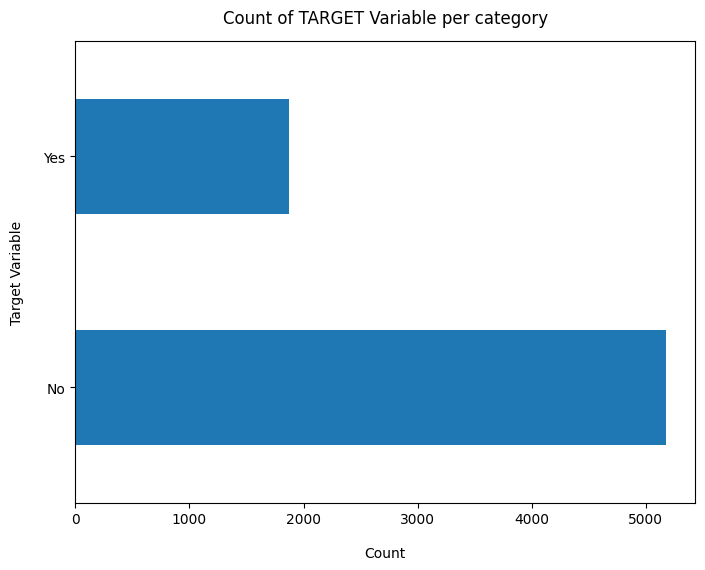

In [8]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
plt.show()

In [10]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [11]:
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
telco_base_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


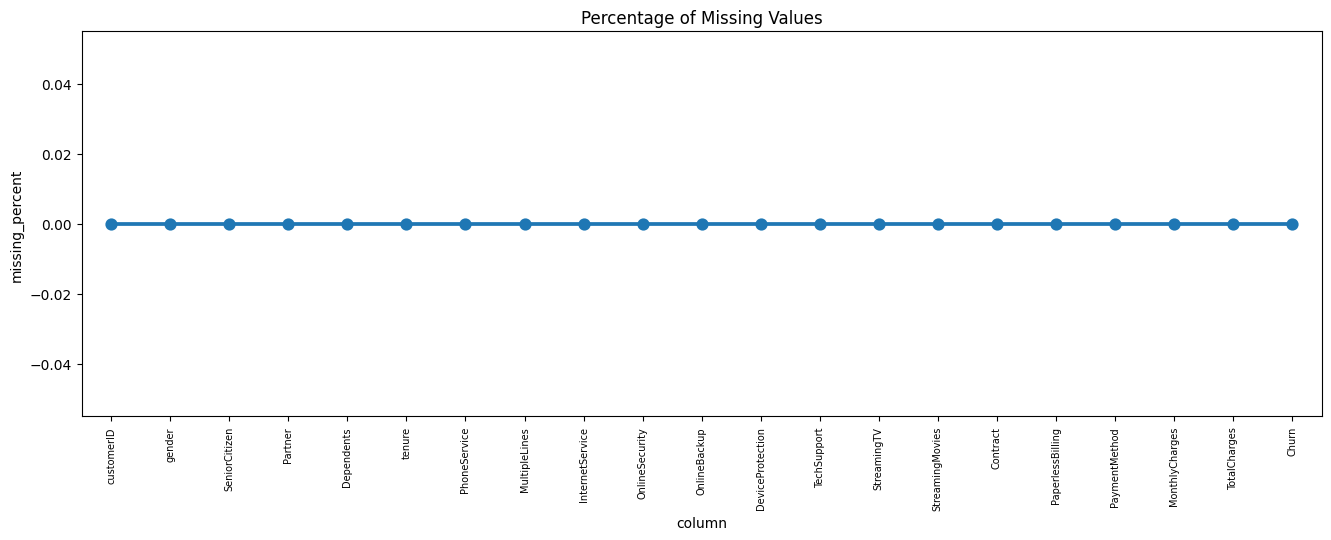

In [13]:

missing = pd.DataFrame({
    'column': telco_base_data.isnull().sum().index,  # Column names
    'missing_percent': (telco_base_data.isnull().sum() * 100) / telco_base_data.shape[0]
})

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column', y='missing_percent', data=missing)  # Explicitly name x and y
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.show()


In [14]:

telco_data = telco_base_data.copy()

In [15]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')


In [16]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)

In [19]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [20]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [21]:
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


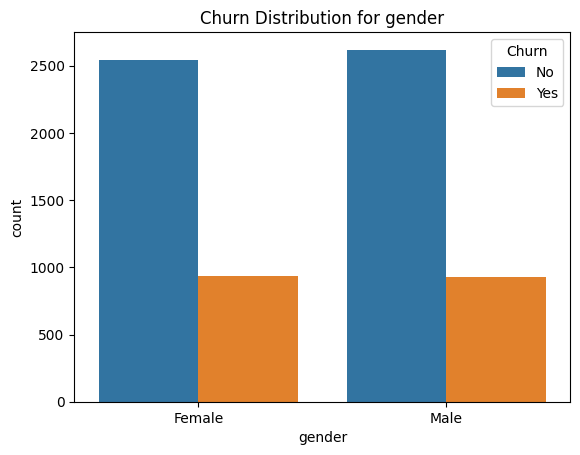

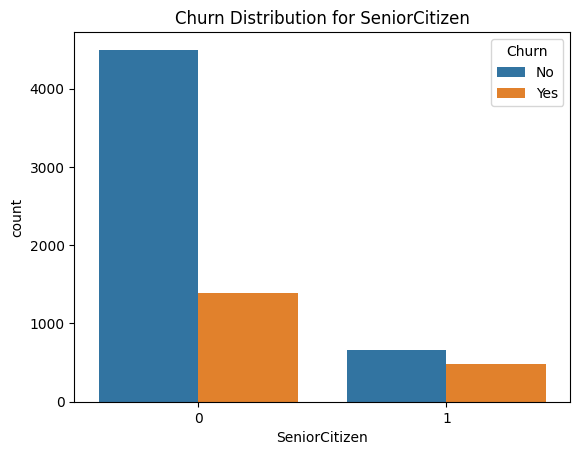

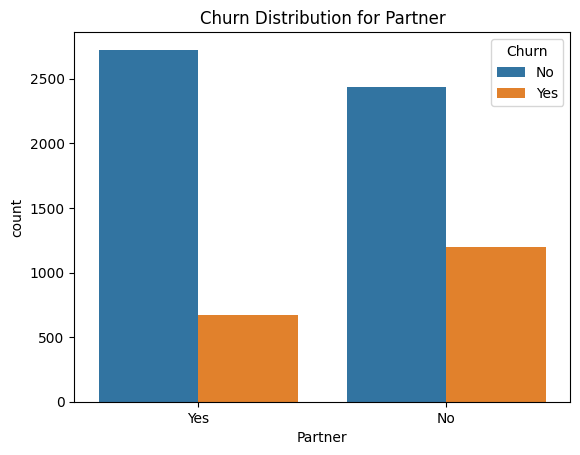

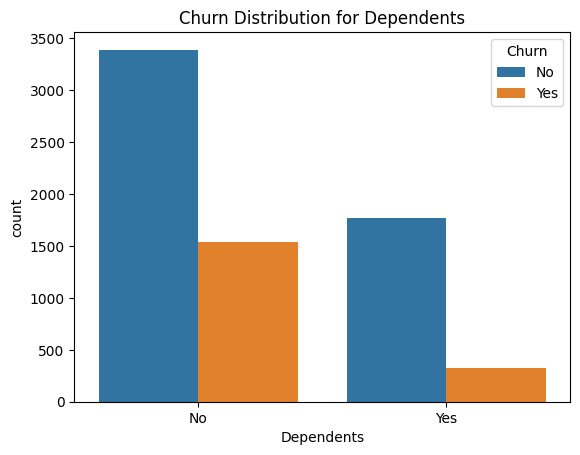

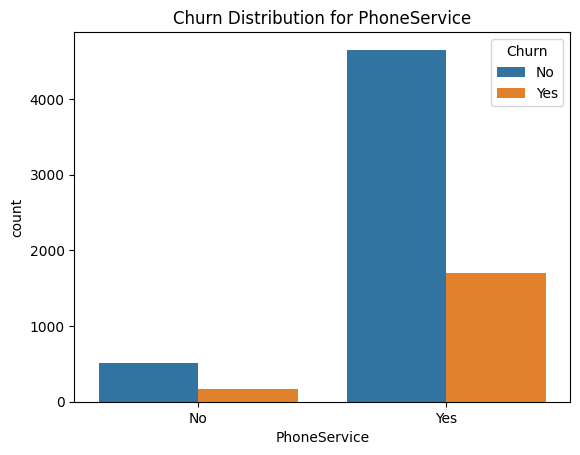

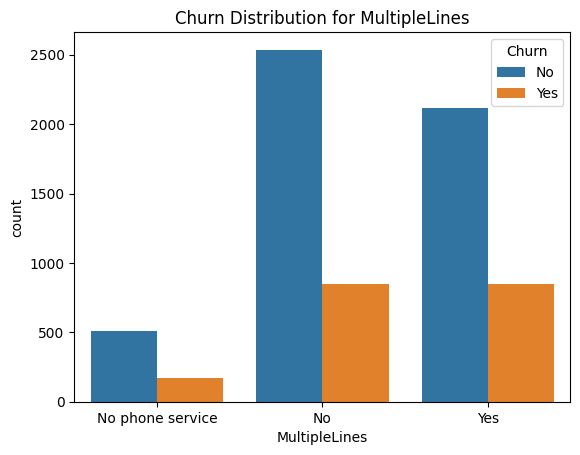

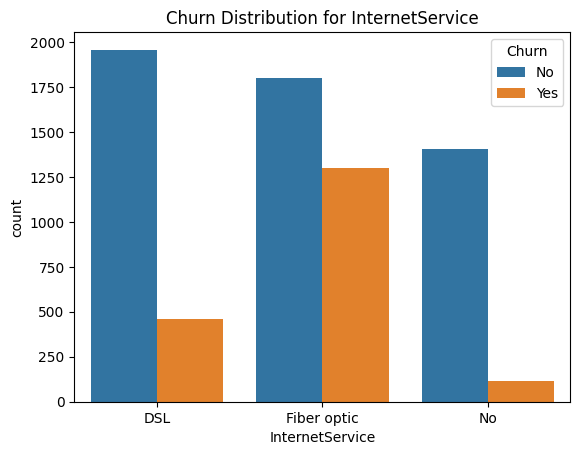

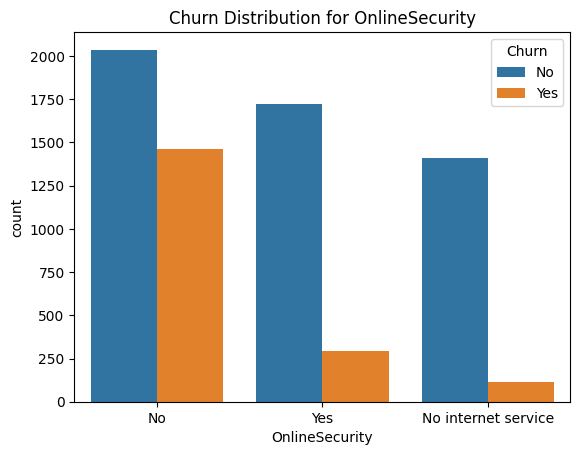

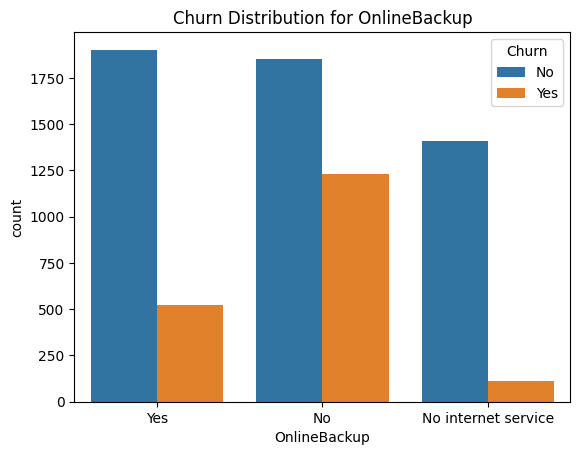

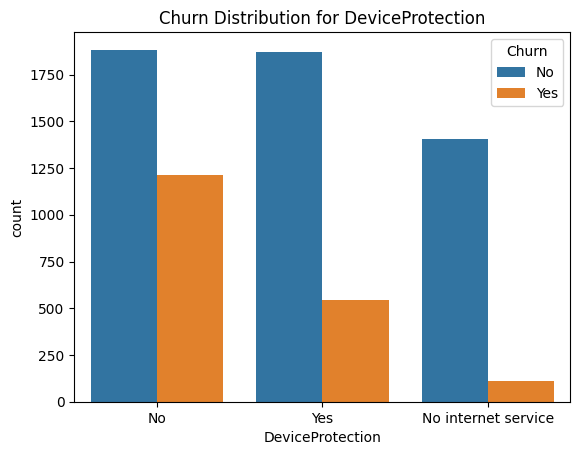

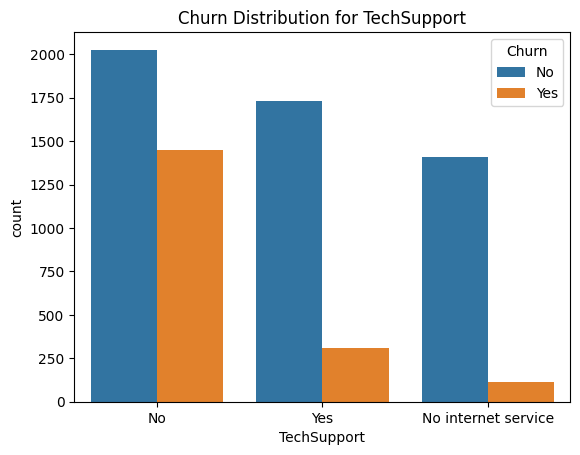

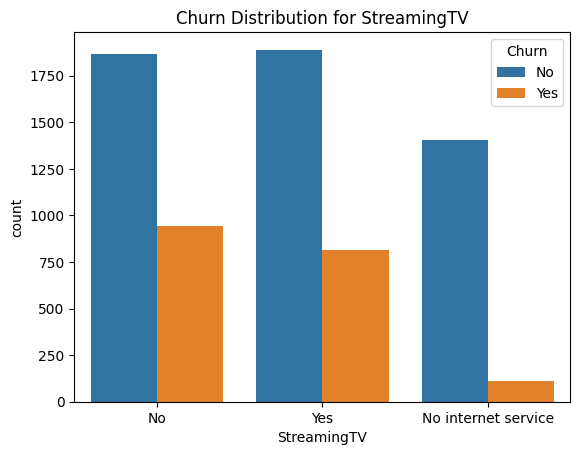

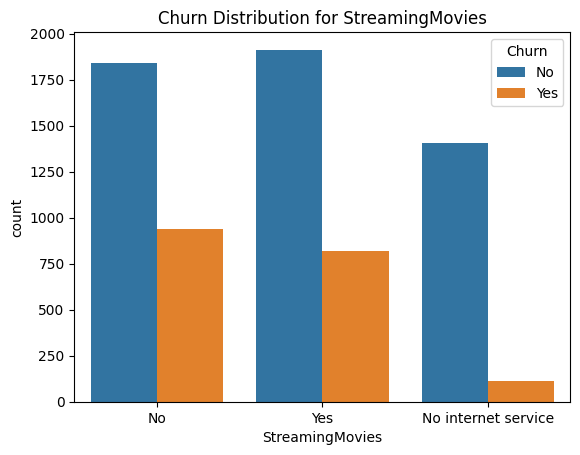

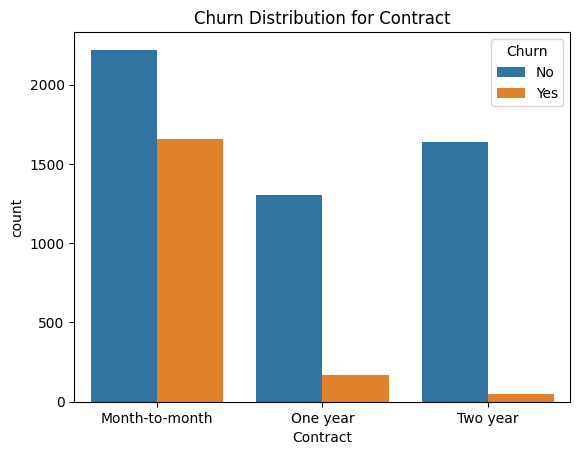

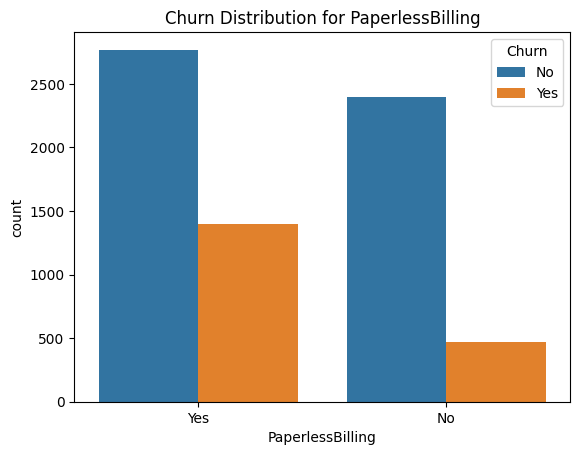

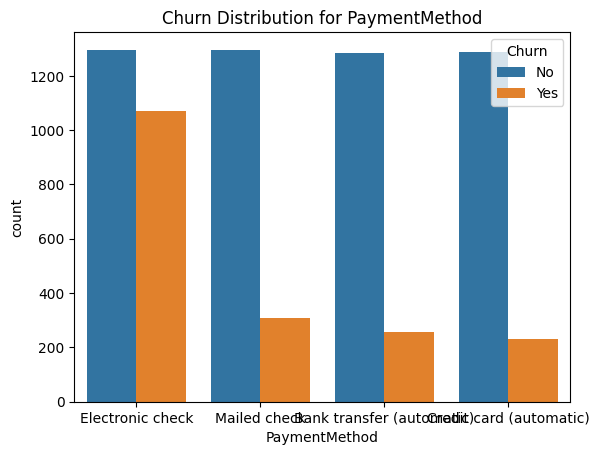

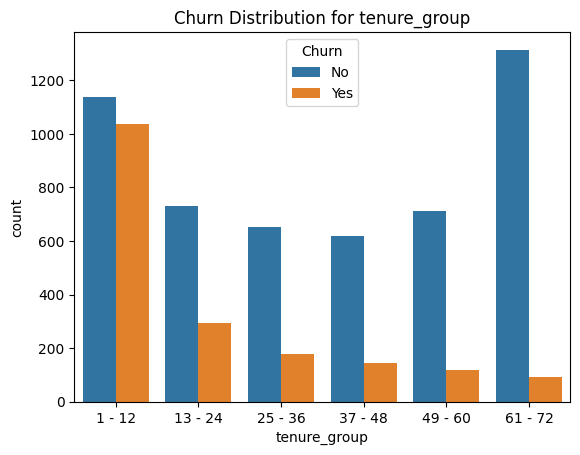

In [22]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)  # Create a new figure for each plot
    sns.countplot(data=telco_data, x=predictor, hue='Churn')
    # plt.xticks(rotation=45)  # Rotate x-axis labels for better readability (if needed)
    plt.title(f"Churn Distribution for {predictor}")  # Add title
    plt.show()  # Display the pl

In [23]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [24]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [25]:
telco_data_dummies = pd.get_dummies(telco_data)
# Convert True/False to 0/1
telco_data_dummies = telco_data_dummies.astype(int)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


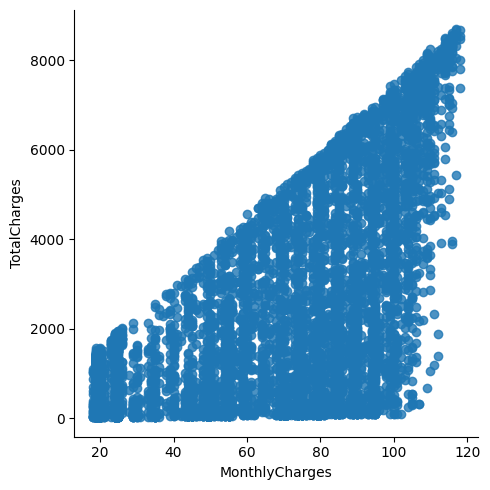

In [26]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [27]:
plt.show()

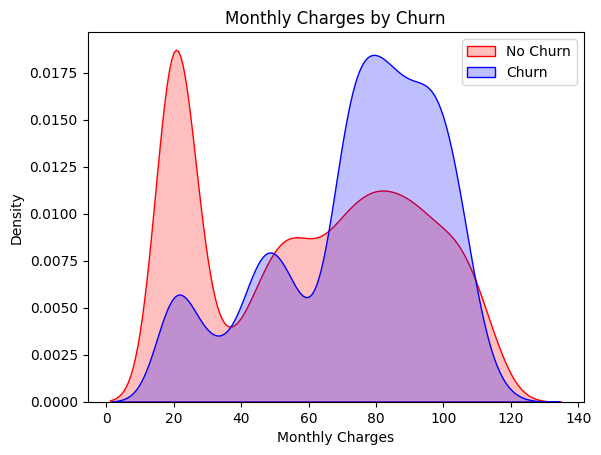

In [28]:
Mth = sns.kdeplot(
    telco_data_dummies.MonthlyCharges[telco_data_dummies["Churn"] == 0],
    color="Red", fill=True
)

Mth = sns.kdeplot(
    telco_data_dummies.MonthlyCharges[telco_data_dummies["Churn"] == 1],
    ax=Mth, color="Blue", fill=True
)

# Add legend and labels
Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn')

# Show the plot
plt.show()

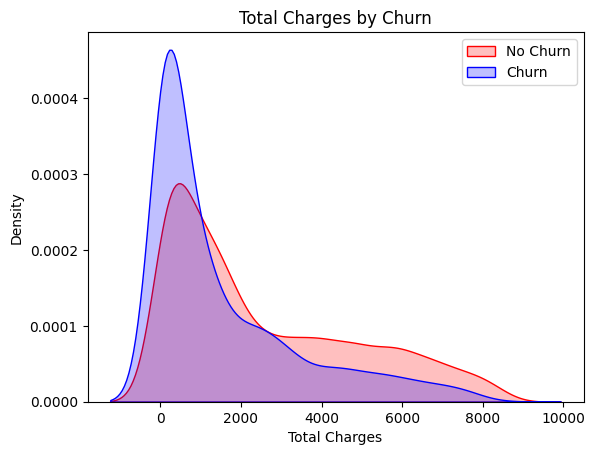

In [29]:
Mth = sns.kdeplot(
    telco_data_dummies.TotalCharges[telco_data_dummies["Churn"] == 0],
    color="Red", fill=True
)

Mth = sns.kdeplot(
    telco_data_dummies.TotalCharges[telco_data_dummies["Churn"] == 1],
    ax=Mth, color="Blue", fill=True
)

# Add legend and labels
Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total Charges by Churn')

# Show the plot
plt.show()

<Axes: >

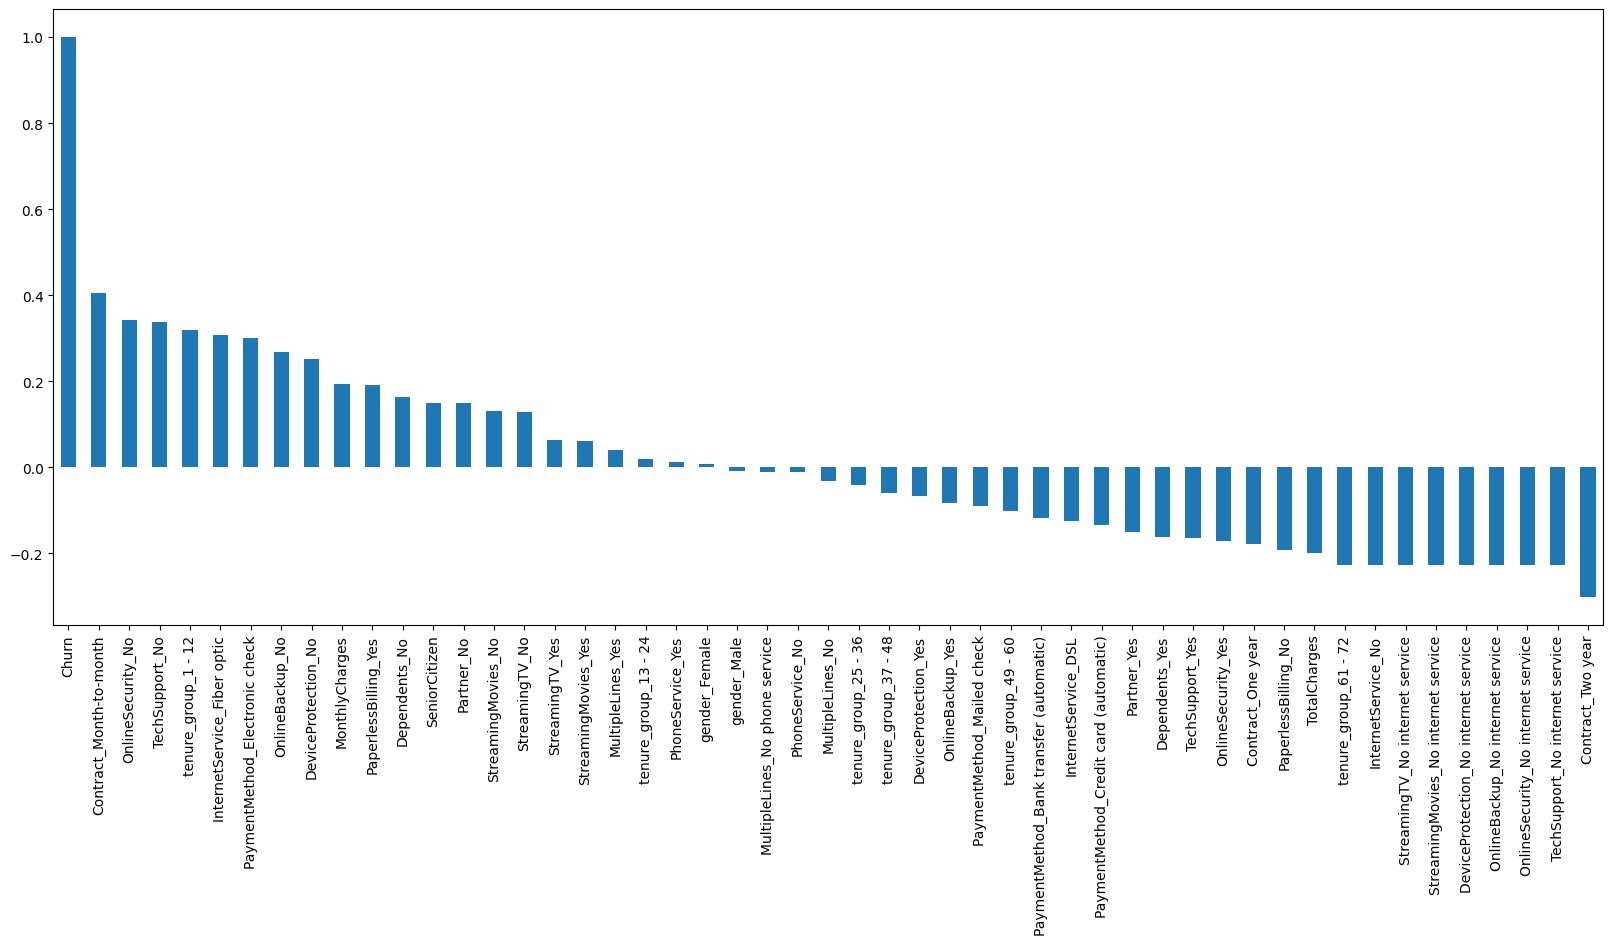

In [30]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [31]:
plt.show()

<Axes: >

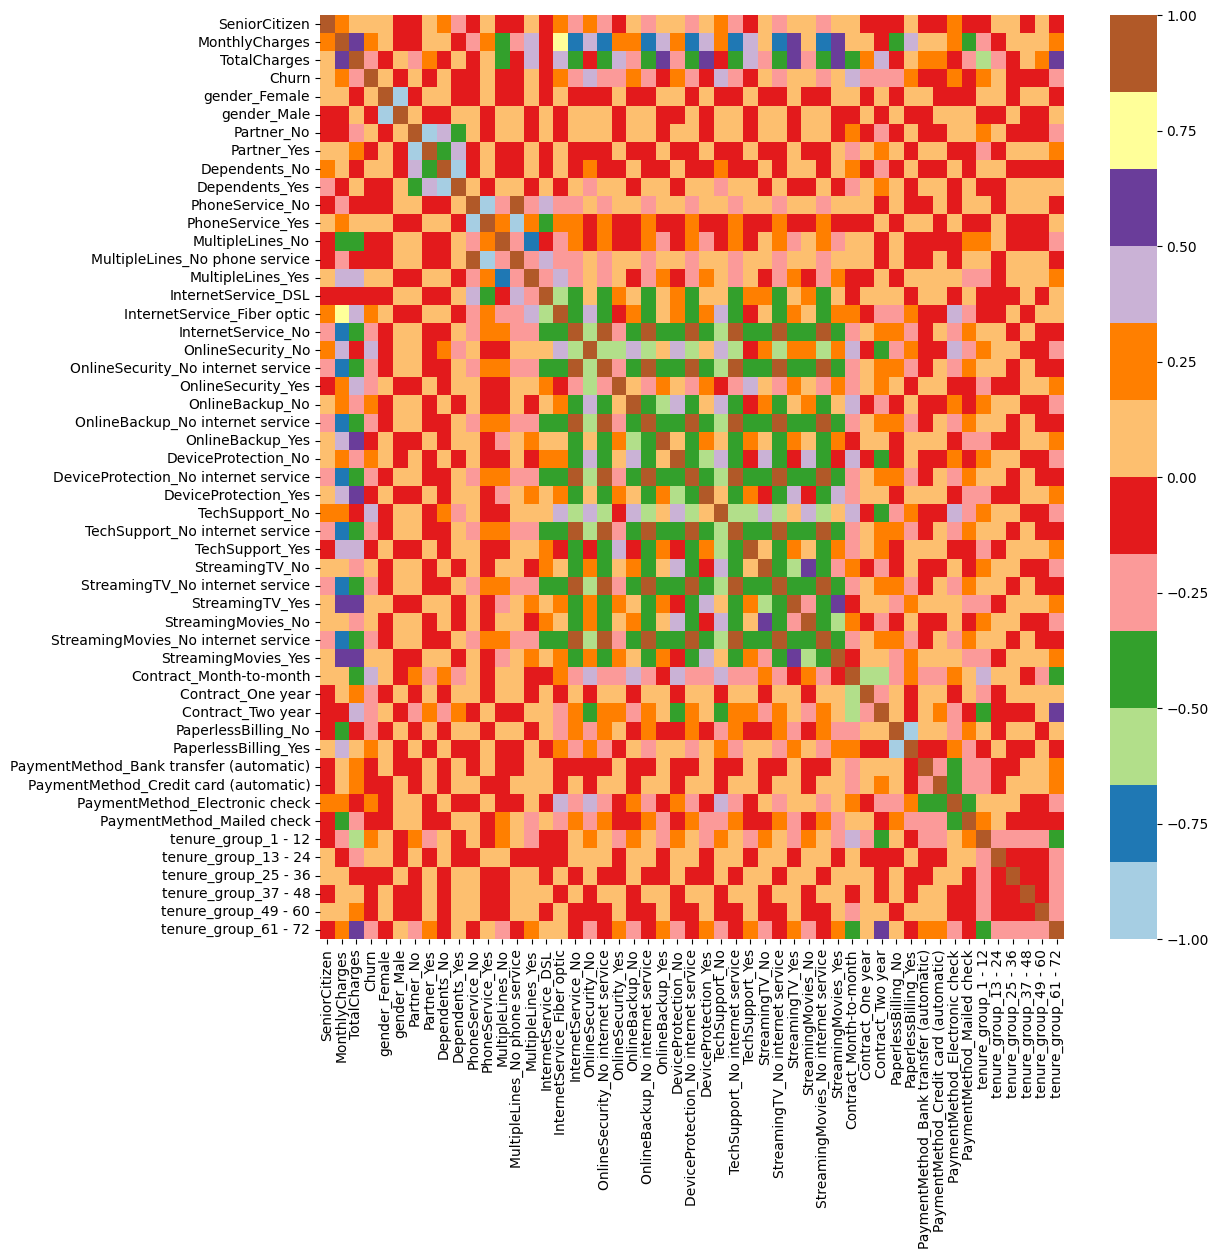

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

In [33]:
plt.show()


In [34]:
from IPython.display import display, Markdown

display(Markdown("## **Bivariate Analysis**"))

## **Bivariate Analysis**

In [35]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [36]:
print(new_df1_target0["gender"].unique())  # Check unique values in target=0
print(new_df1_target1["gender"].unique())  # Check unique values in target=1




['Female' 'Male']
['Male' 'Female']


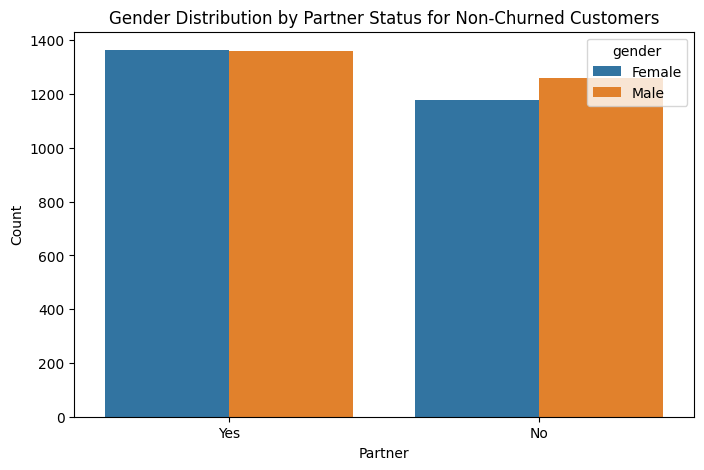

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(data=new_df1_target0, x="Partner", hue="gender")
plt.title("Gender Distribution by Partner Status for Non-Churned Customers")
plt.xlabel("Partner")
plt.ylabel("Count")
plt.show()

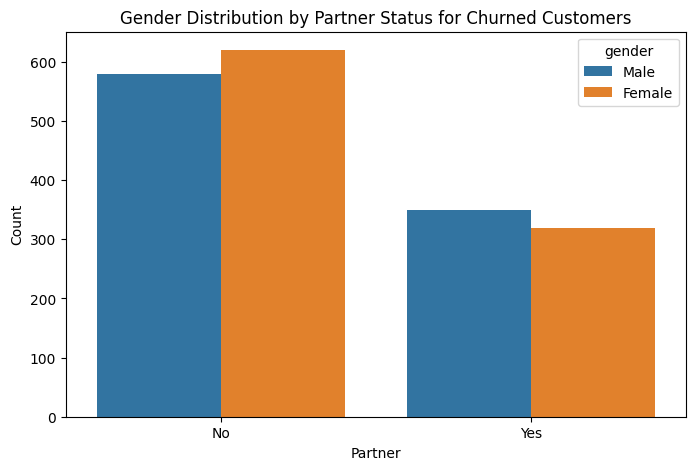

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=new_df1_target1, x="Partner", hue="gender")
plt.title("Gender Distribution by Partner Status for Churned Customers")
plt.xlabel("Partner")
plt.ylabel("Count")
plt.show()

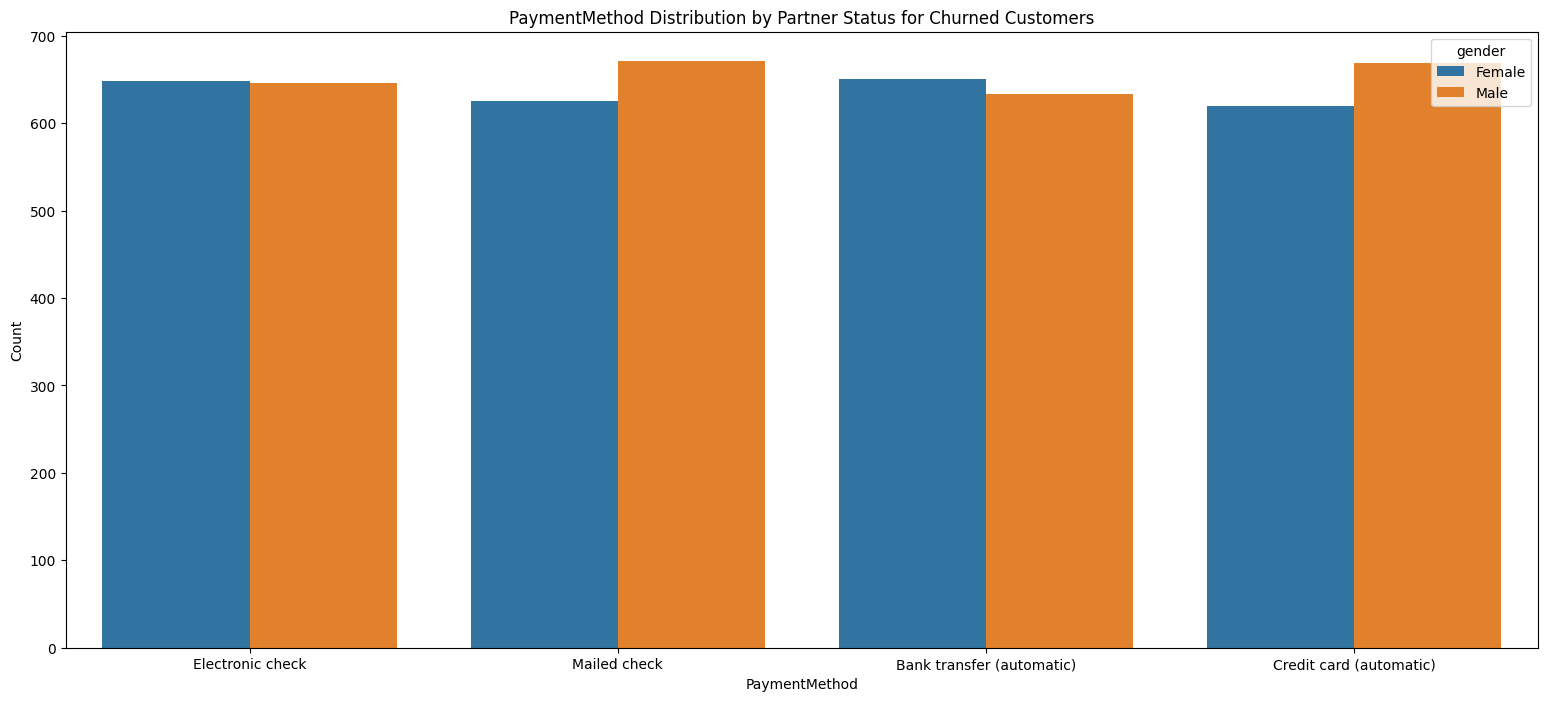

In [39]:
plt.figure(figsize=(19, 8))
sns.countplot(data=new_df1_target0, x="PaymentMethod", hue="gender")
plt.title("PaymentMethod Distribution by Partner Status for Churned Customers")
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.show()

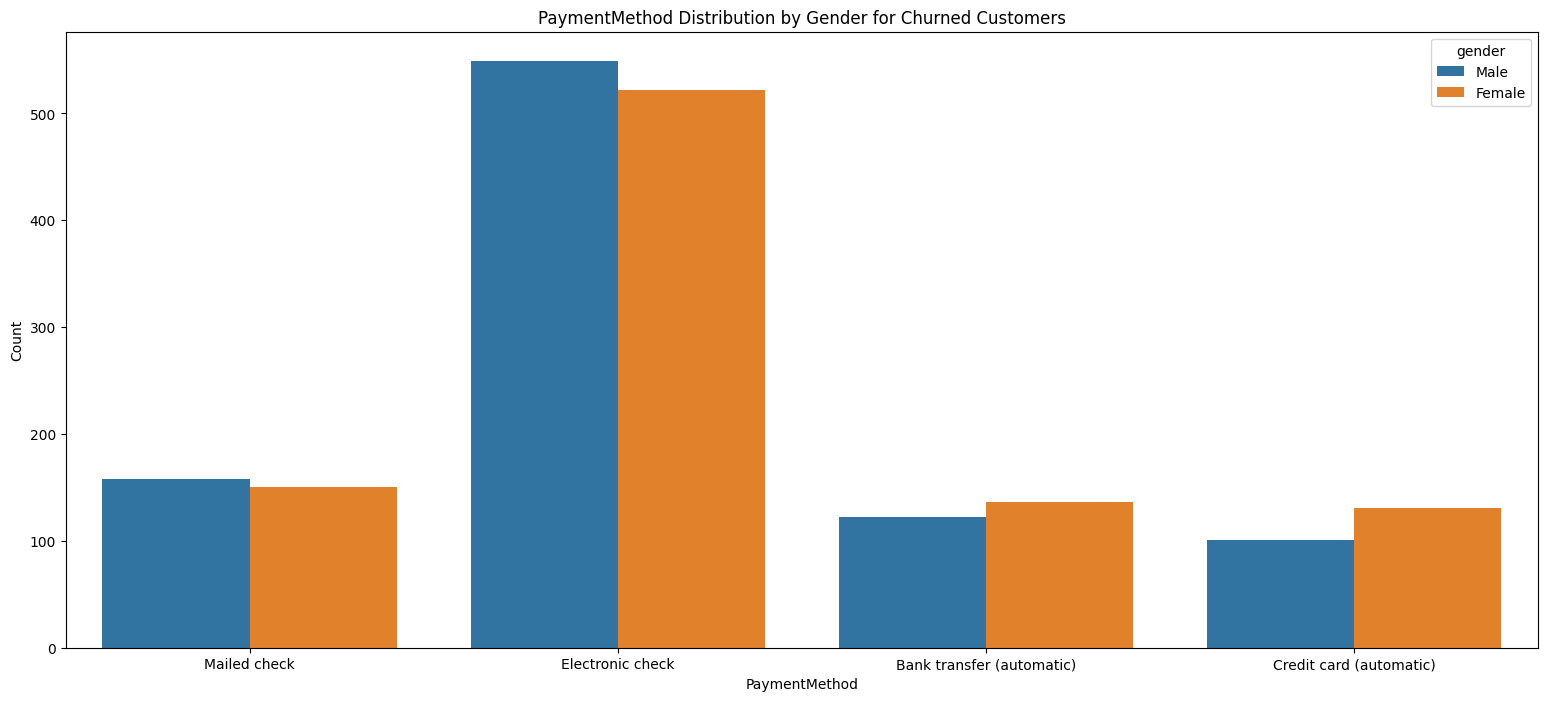

In [40]:
plt.figure(figsize=(19, 8))
sns.countplot(data=new_df1_target1, x="PaymentMethod", hue="gender")
plt.title("PaymentMethod Distribution by Gender for Churned Customers")
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.show()


In [41]:
churned_m_creditcard_automatic = new_df1_target1[
    (new_df1_target1['gender'] == 'Male') &
    (new_df1_target1['PaymentMethod'] == 'Credit card(automatic)') 
].shape[0]

print(f"Churned male customers with CreditCard and Automatic payment method: {churned_m_creditcard_automatic}")

Churned male customers with CreditCard and Automatic payment method: 0


In [42]:
print(new_df1_target1.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')


In [43]:
print(new_df1_target1['PaymentMethod'].unique())


['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [44]:
churned_m_creditcard_automatic = new_df1_target1[
    (new_df1_target1['gender'] == 'Male') &
    (new_df1_target1['PaymentMethod'] == 'Credit card (automatic)')  # Ensure this matches the exact value
].shape[0]

print(f"Churned male customers with CreditCard and Automatic payment method: {churned_m_creditcard_automatic}")


Churned male customers with CreditCard and Automatic payment method: 101


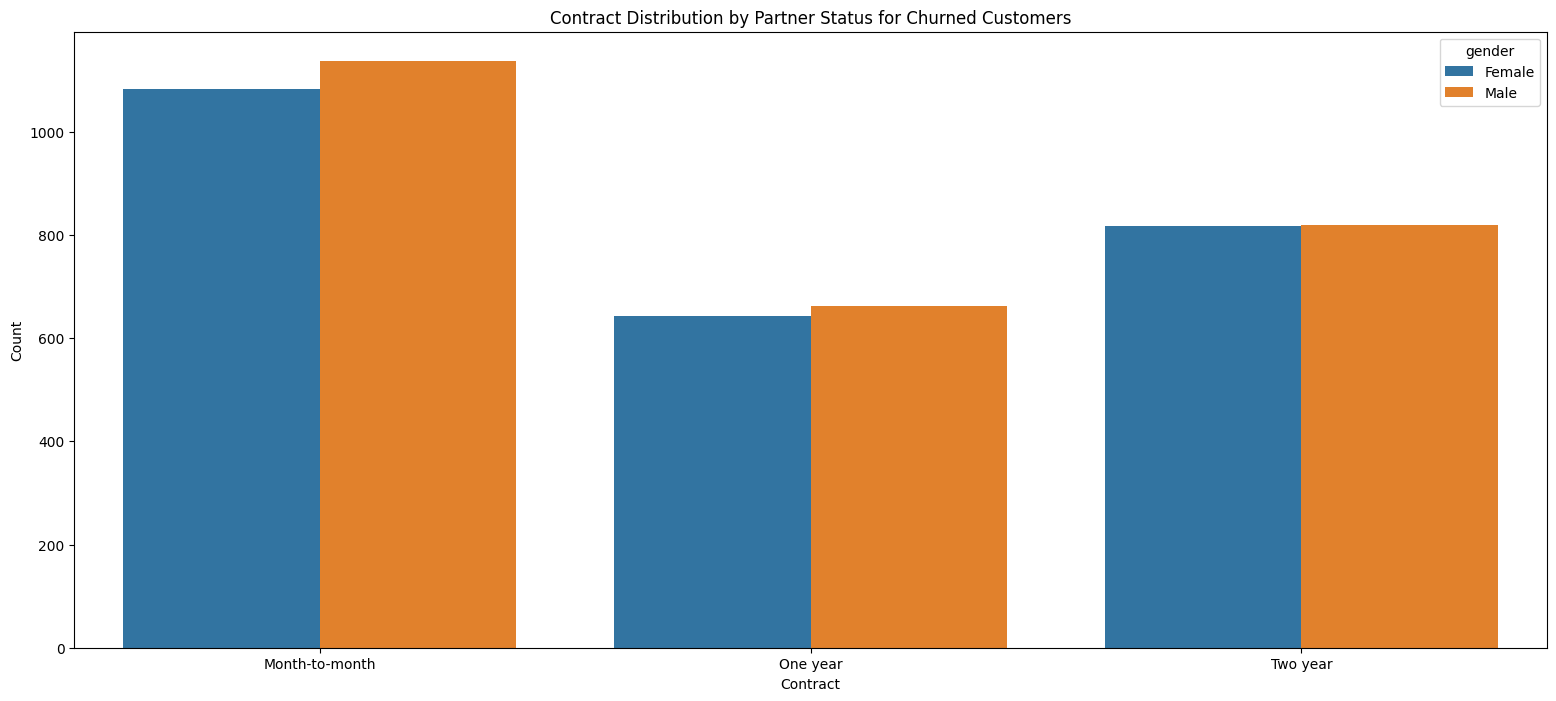

In [45]:
plt.figure(figsize=(19, 8))
sns.countplot(data=new_df1_target0, x="Contract", hue="gender")
plt.title("Contract Distribution by Partner Status for Churned Customers")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.show()

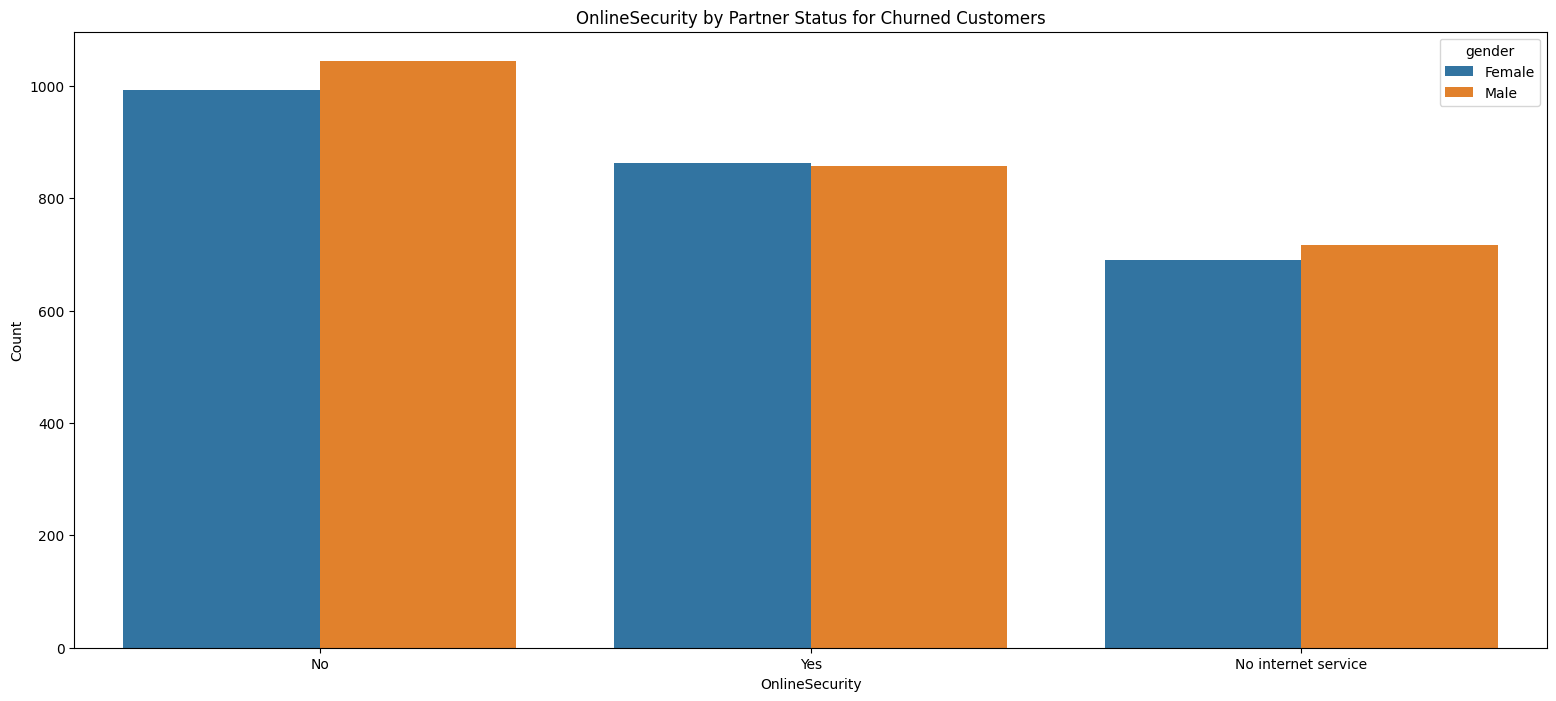

In [46]:
plt.figure(figsize=(19, 8))
sns.countplot(data=new_df1_target0, x="OnlineSecurity", hue="gender")
plt.title("OnlineSecurity by Partner Status for Churned Customers")
plt.xlabel("OnlineSecurity")
plt.ylabel("Count")
plt.show()

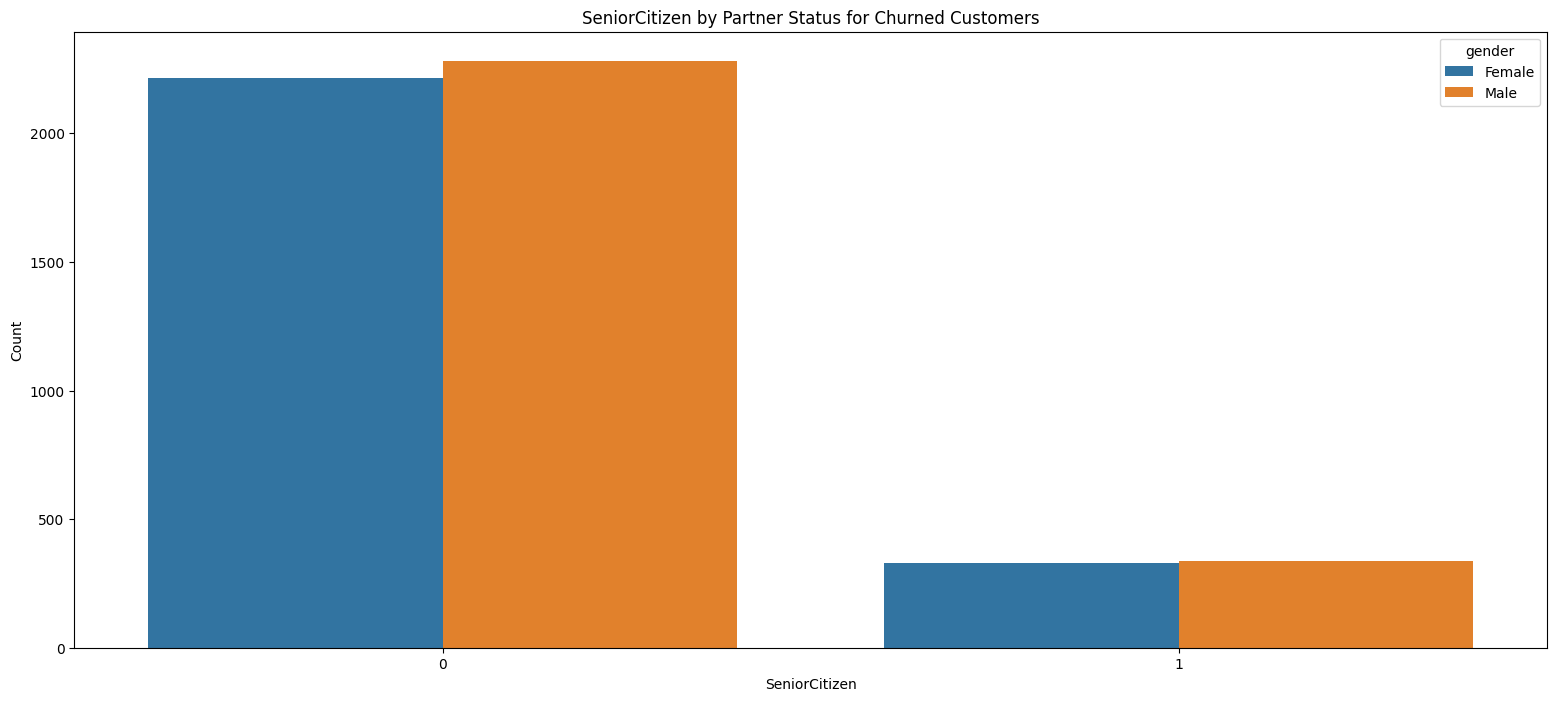

In [47]:
plt.figure(figsize=(19, 8))
sns.countplot(data=new_df1_target0, x="SeniorCitizen", hue="gender")
plt.title("SeniorCitizen by Partner Status for Churned Customers")
plt.xlabel("SeniorCitizen")
plt.ylabel("Count")
plt.show()

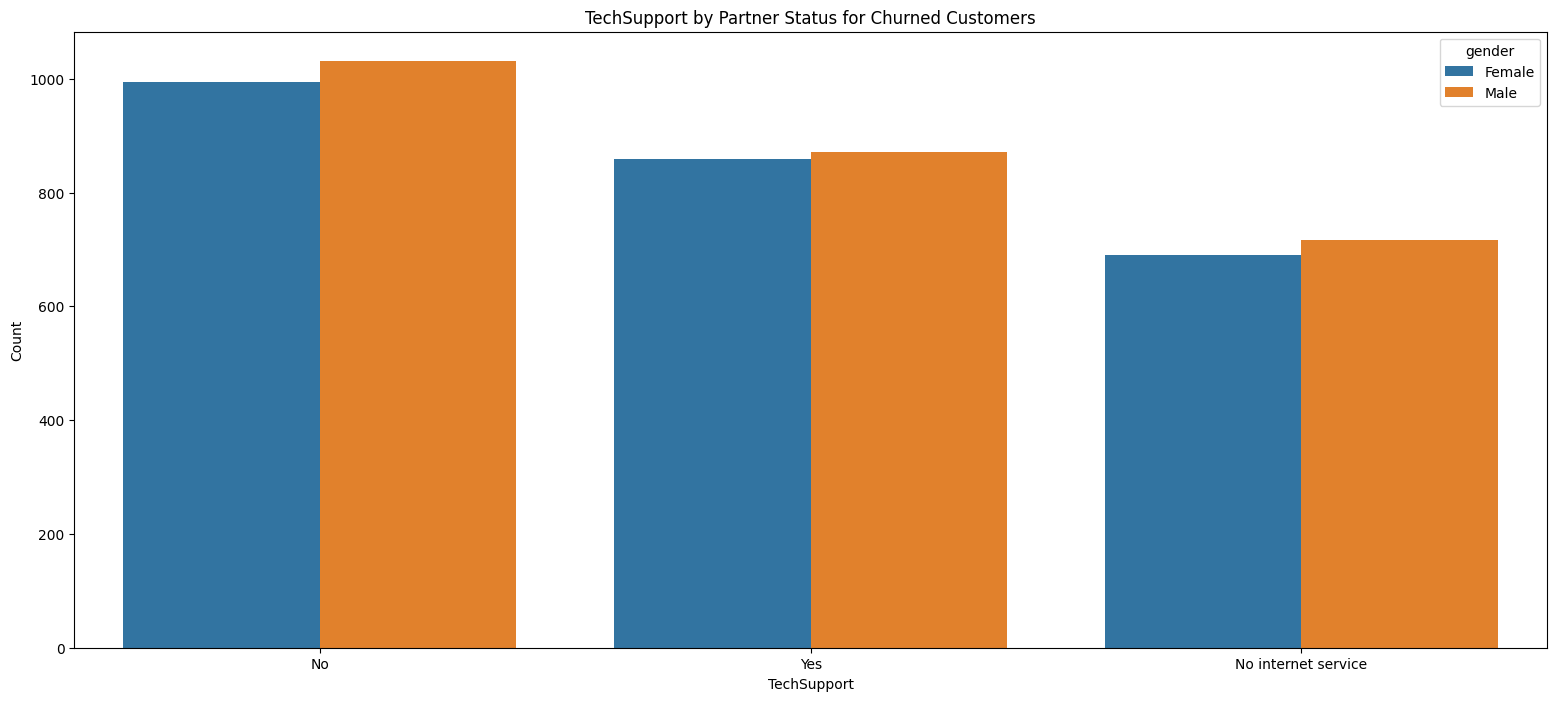

In [48]:
plt.figure(figsize=(19, 8))
sns.countplot(data=new_df1_target0, x="TechSupport", hue="gender")
plt.title("TechSupport by Partner Status for Churned Customers")
plt.xlabel("TechSupport")
plt.ylabel("Count")
plt.show()

In [49]:
from IPython.display import display, Markdown

# Conclusion text formatted in Markdown
conclusion_text = """
# **CONCLUSION**
These are some of the quick insights from this:

- **Electronic check medium are the highest churners**
- **Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.**
- **No Online security, No Tech Support category are high churners**
- **Non senior Citizens are high churners**
"""

# Display the conclusion with Markdown
display(Markdown(conclusion_text))



# **CONCLUSION**
These are some of the quick insights from this:

- **Electronic check medium are the highest churners**
- **Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.**
- **No Online security, No Tech Support category are high churners**
- **Non senior Citizens are high churners**


In [50]:
telco_data_dummies.to_csv('telco_data_dummies.csv', index=False)
